<a href="https://colab.research.google.com/github/Tim-Miga/TIM-MIGA-Image-Classification-Langit-Cerah-Mendung-Sunset-UAS-DEEP-LEARNING/blob/main/Image_classification_langit_tim_miga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.preprocessing.image import load_img

In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.6 MB 14.2 MB/s 
     |████████████████████████████████| 57 kB 4.7 MB/s 
     |████████████████████████████████| 54 kB 3.3 MB/s 
     |████████████████████████████████| 141 kB 76.5 MB/s 
     |████████████████████████████████| 84 kB 4.7 MB/s 
     |████████████████████████████████| 2.3 MB 61.5 MB/s 
     |████████████████████████████████| 275 kB 70.1 MB/s 
     |████████████████████████████████| 54 kB 3.2 MB/s 
     |████████████████████████████████| 212 kB 86.9 MB/s 
     |████████████████████████████████| 84 kB 3.3 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
     |████████████████████████████████| 80 kB 10.4 MB/s 
     |████████████████████████████████| 68 kB 7.0 MB/s 
     |████████████████████████████████| 43 kB 2.5 MB/s 
     |████████████████████████████████| 856 kB 57.0 MB/s 
     |████████████████████████████████| 62 kB 1.

In [ ]:
import os
import PIL
import pathlib
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import preprocessing
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.python.ops.numpy_ops import np_utils

In [ ]:
data_dir = '/content/drive/MyDrive/CLASSIFICATION LANGIT'
print(data_dir)

/content/drive/MyDrive/CLASSIFICATION LANGIT


In [ ]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 300 files belonging to 3 classes.
Using 240 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 300 files belonging to 3 classes.
Using 60 files for validation.


In [ ]:
for image_batch, label_batch in train_ds.take(1):
  print(image_batch.shape)
  print(image_batch[1])
  print(label_batch.numpy())

(32, 180, 180, 3)
tf.Tensor(
[[[ 81.        81.        81.      ]
  [ 81.        81.        81.      ]
  [ 81.        81.        81.      ]
  ...
  [171.11104  170.11104  165.11104 ]
  [168.4721   167.4721   162.4721  ]
  [177.19444  176.19444  171.19444 ]]

 [[ 82.5       82.5       82.5     ]
  [ 82.5       82.5       82.5     ]
  [ 82.5       82.5       82.5     ]
  ...
  [175.36115  174.36115  169.36115 ]
  [172.58344  171.58344  166.58344 ]
  [174.61108  173.61108  168.61108 ]]

 [[ 85.833336  85.833336  85.833336]
  [ 84.        84.        84.      ]
  [ 84.        84.        84.      ]
  ...
  [168.       167.       162.      ]
  [173.86115  172.86115  167.86115 ]
  [174.       173.       168.      ]]

 ...

 [[104.16669   91.16669   75.16669 ]
  [104.        91.        75.      ]
  [103.        89.        76.      ]
  ...
  [ 73.        65.        54.      ]
  [ 73.        65.        54.      ]
  [ 73.        65.        54.      ]]

 [[102.5       89.5       73.5     ]
  [103.5

In [ ]:
class_names = train_ds.class_names
print(class_names)

['langit cerah', 'langit mendung', 'sunset']


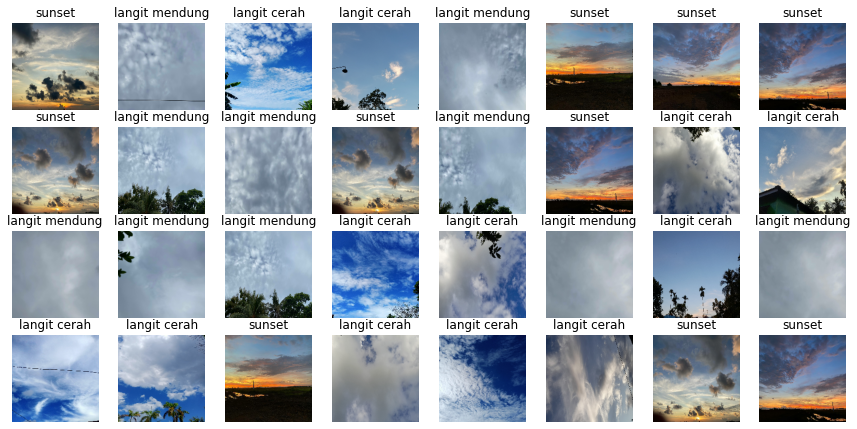

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
for image_batch, labels_batch in train_ds.take(1):
    for i in range(batch_size):
        ax = plt.subplot(8, 8, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [ ]:
num_classes = 3

model = models.Sequential([
    # data_augmentation
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(32, kernel_size = (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,  kernel_size = (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,  kernel_size = (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes,activation='softmax')
])

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        3

In [ ]:
history = model.fit(
    train_ds,
    batch_size=batch_size,
    validation_data=val_ds,
    verbose=1,
    epochs=10
)

Epoch 1/10
8/8 [==============================] - 33s 3s/step - loss: 1.0934 - accuracy: 0.3542 - val_loss: 1.0696 - val_accuracy: 0.3333
Epoch 2/10
8/8 [==============================] - 16s 1s/step - loss: 0.9453 - accuracy: 0.4792 - val_loss: 0.7403 - val_accuracy: 0.5667
Epoch 3/10
8/8 [==============================] - 16s 1s/step - loss: 0.6397 - accuracy: 0.6750 - val_loss: 0.4929 - val_accuracy: 0.7833
Epoch 4/10
8/8 [==============================] - 18s 2s/step - loss: 0.4185 - accuracy: 0.8000 - val_loss: 0.3988 - val_accuracy: 0.8833
Epoch 5/10
8/8 [==============================] - 16s 1s/step - loss: 0.3588 - accuracy: 0.8500 - val_loss: 0.2676 - val_accuracy: 0.8833
Epoch 6/10
8/8 [==============================] - 16s 1s/step - loss: 0.2242 - accuracy: 0.9125 - val_loss: 0.1837 - val_accuracy: 0.9167
Epoch 7/10
8/8 [==============================] - 16s 1s/step - loss: 0.3839 - accuracy: 0.8292 - val_loss: 2.0037 - val_accuracy: 0.6000
Epoch 8/10
8/8 [==================

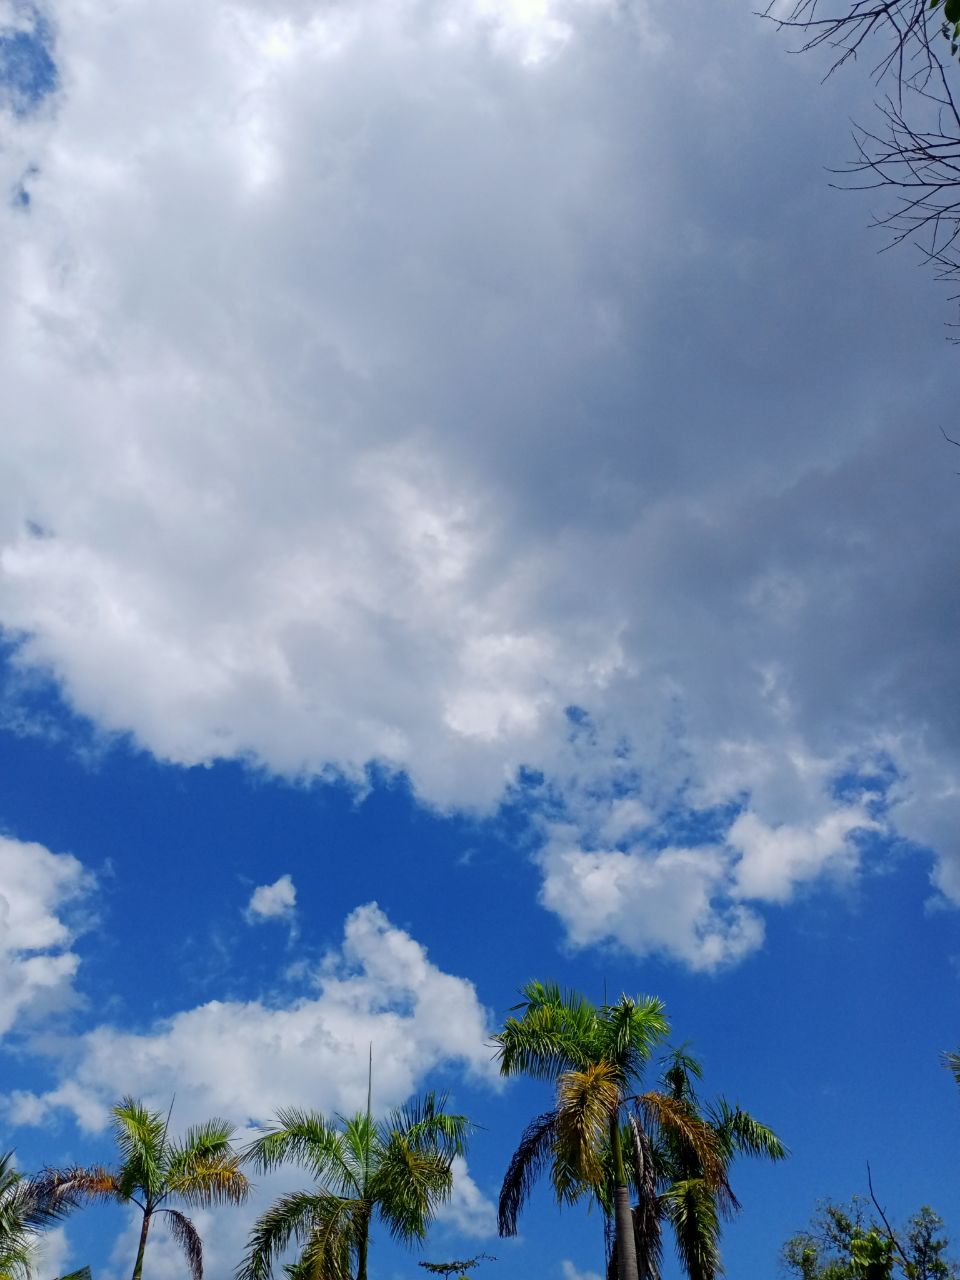

In [ ]:
image_path = "/content/drive/MyDrive/CLASSIFICATION LANGIT/langit cerah/langit (1).jpg"
image = preprocessing.image.load_img(image_path)
image_array = preprocessing.image.img_to_array(image)
scaled_img = np.expand_dims(image_array, axis=0)
image

In [ ]:
import gradio as gr

In [ ]:
def predict_image(img):
  img_4d=img.reshape(-1,180,180,3)
  prediction=model.predict(img_4d)[0]
  return {class_names[i]: float(prediction[i]) for i in range(3)}

In [ ]:
image = gr.inputs.Image(shape=(180,180))
label = gr.outputs.Label(num_top_classes=5)
  
gr.Interface(fn=predict_image, inputs=image, outputs=label,interpretation='default').launch(debug='True')

/usr/local/lib/python3.7/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  "Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  "Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
 

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://46267.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces
